<a href="https://colab.research.google.com/github/Twinspeedr/P_School/blob/main/notebooks/MikeXClass/CodeChallenge1_DUDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Derivative calculations ###

import numpy as np
import matplotlib.pyplot as plt

# Import the sybolic math module SymPy (lots of cool methods in SymPy):
### SymPy is not used as much in actual ML/DL it is a good way to illustrate derivatives in Python ###

import sympy as sym
import sympy.plotting.plot as symplot

## Symbolic variables:
x = sym.symbols('x')

## Create the function
fx = 2*x**2 # the derivative function is = 4*x**1 or 4x

## Compute the function Derivative:
df = sym.diff(fx,x)

## Print out each

print(fx)
print(df)

2*x**2
4*x


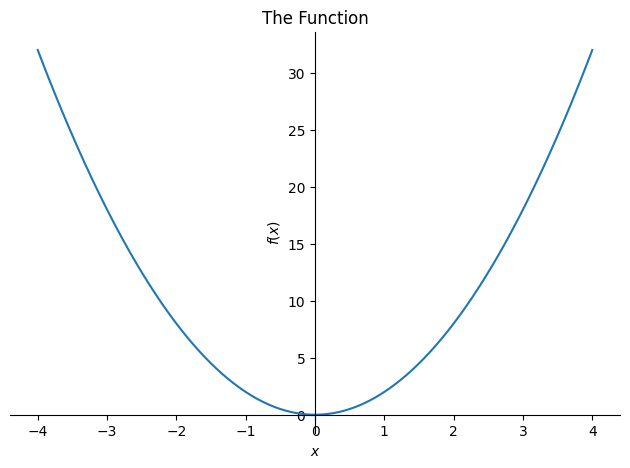

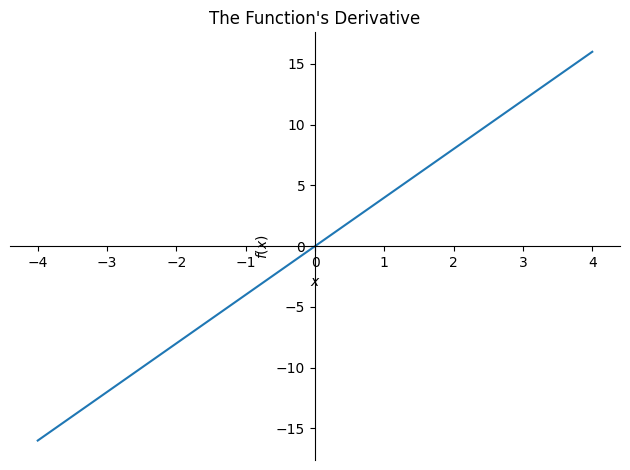

In [ ]:
## Plotting the new Derivative function of 4x

# Graph the Function
symplot(fx,(x,-4,4), title='The Function')
plt.show()

# Graph the derivative:
symplot(df,(x,-4,4), title="The Function's Derivative")
plt.show()




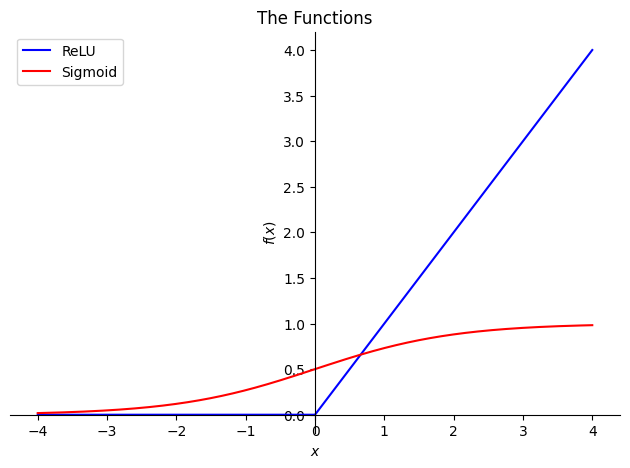

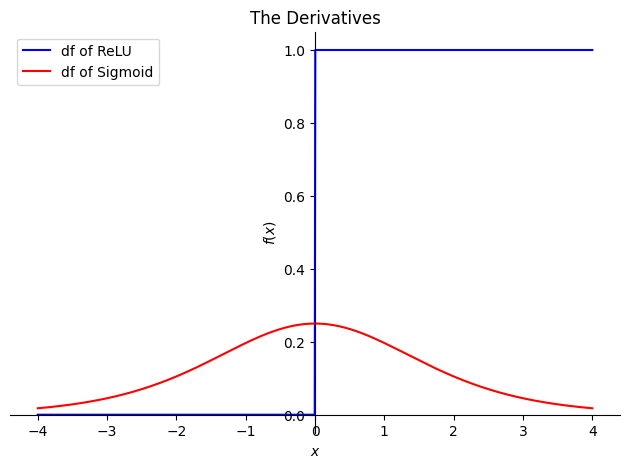

In [ ]:
## Repeat Derivative calculation for ReLU and Sigmoids ##

## Build the relu and Sigmoid functions
relu = sym.Max(0,x)
sigmoid = 1 / (1+sym.exp(-x))

# Plot the functions

p = symplot( relu,(x,-4,4),label='ReLU', show=False, line_color='blue' )
p.extend( symplot(sigmoid,(x,-4,4),label='Sigmoid', show=False, line_color='red' ) )
p.legend = True
p.title = "The Functions"
p.show()

# Plot the derivatives:
p = symplot( sym.diff(relu),(x,-4,4),label='df of ReLU', show=False, line_color='blue' )
p.extend( symplot(sym.diff(sigmoid),(x,-4,4),label='df of Sigmoid', show=False, line_color='red' ) )
p.legend = True
p.title = "The Derivatives"
p.show()



In [ ]:
### Derivative Product Rule and Chain rules ###

import numpy as np
import sympy as sym
from IPython.display import display

## Symbolic variables:
x = sym.symbols('x')

## Create the functions
fx = 2*x**2
gx = 4*x**3 - 3*x**4

## Compute the function Derivatives:
df = sym.diff(fx)
dg = sym.diff(gx)

## Product rule manual steps
manual = df*gx + fx*dg
thewrongway = df*dg

# via SymPy
viasympy = sym.diff( fx*gx )

## Print out
print("The Functions: ")
display(fx)
display(gx)
print(' ')

print("Their Derivatives: ")
display(df)
display(dg)
print(' ')

print("The Manual Product Rule: ")
display(manual)
print(' ')

print("Via SymPy Library: ")
display(viasympy)
print(' ')

print("The Wrong Way (violates the Product Rule): ")
display(thewrongway)
print(' ')

The Functions: 


2*x**2

-3*x**4 + 4*x**3

 
Their Derivatives: 


4*x

-12*x**3 + 12*x**2

 
The Manual Product Rule: 


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

 
Via SymPy Library: 


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

 
The Wrong Way (violates the Product Rule): 


4*x*(-12*x**3 + 12*x**2)

In [ ]:
### Repeat to show the Chain Rule for embedded ###

gx = x**2 + 4*x**3
fx = ( gx )**5

print("The Function: ")
display(fx)
print(' ')

print("Its Derivative: ")
display(sym.diff(fx))


The Function: 


(4*x**3 + x**2)**5

 
Its Derivative: 


(60*x**2 + 10*x)*(4*x**3 + x**2)**4

In [ ]:
### Gradient Decent in 1D ###


import numpy as np
import matplotlib.pyplot as plt

# Draws in sharper SVG format (Deprecated)
#   from IPython import display
#   display.set_matplotlib_formats('svg')

# New SVG formatting option:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

/tmp/ipython-input-196562072.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
## Function Definitions ##
# Define the x function
def fx(x):
    return 3*x**2 - 3*x + 4

# Derivative of x function
def deriv(x):
    return 6*x - 3

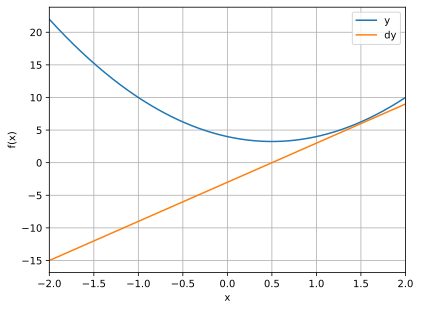

In [ ]:
## Plot the function  and its derivative:

# define the range of x
x = np.linspace(-2,2,2001)

# Plot the graphs:
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()



In [ ]:
## Random starting point for the function ##
localmin = np.random.choice(x,1) # choose 1 random choice value from vector x
print(localmin)
## Learning paraameters

learning_rate = .01
training_epochs = 100

## Run through the training

for i in range(training_epochs):
    grad = deriv(localmin) # take a derivative guess at the Local Minimum
    localmin = localmin - learning_rate*grad # then adjust the Local Minimum to be itself minus the learning rate * the guessed gradient value for 100 epochs
localmin


[0.252]


array([0.49949039])

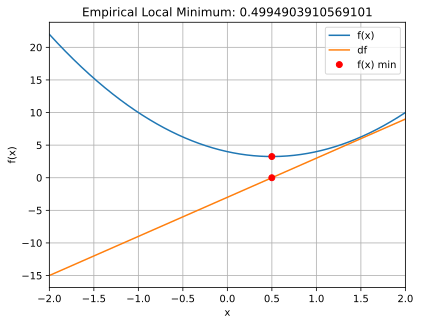

In [ ]:
## Plot the results ##

plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin), 'ro')
plt.plot(localmin,fx(localmin), 'ro')
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical Local Minimum: %s'%localmin[0])
plt.show()

In [ ]:
### Repeat but include every localmin value as the FOR Loop cycles through each training epoch ###

localmin = np.random.choice(x,1) # choose 1 random choice value from vector x
print(localmin)
## Learning parameters

learning_rate = .1
training_epochs = 7

## Run through the trainingm and store the results

modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
    grad = deriv(localmin) # take a derivative guess at the Local Minimum
    localmin = localmin - learning_rate*grad # then adjust the Local Minimum to be itself minus the learning rate * the guessed gradient value for 100 epochs
    modelparams[i,0] = localmin[0]
    modelparams[i,1] = grad[0]

localmin

[0.268]


array([0.49961989])

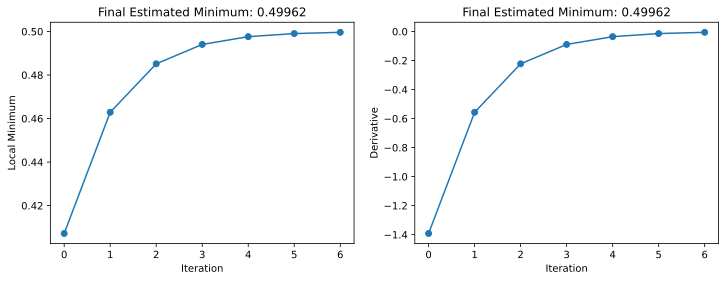

In [ ]:
## Plot the gradient over 100 itertions
fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
    ax[i].plot(modelparams[:,i],'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f'Final Estimated Minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local Minimum')
ax[1].set_ylabel('Derivative')

plt.show()